In [ ]:
import pandas as pd
import plotly.express as px   # pastikan ada baris ini

# Baca data dari Excel
df = pd.read_excel("data_kuesioner.xlsx")
df.head()

# Reshape data agar semua jawaban jadi satu kolom
all_answers = df.melt(id_vars=["Partisipan"], var_name="Question", value_name="Score")

# Plot histogram distribusi jawaban
fig = px.histogram(
    all_answers,
    x="Score",
    color="Score",
    text_auto=True,
    title="Distribusi Jawaban Kuesioner (Keseluruhan)"
)
fig.show()

,Partisipan,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,1,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
1,2,S,S,S,S,S,S,S,S,CS,S,S,S,S,S,S,S,S
2,3,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS
3,4,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
4,5,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS


## 1. Bar Chart

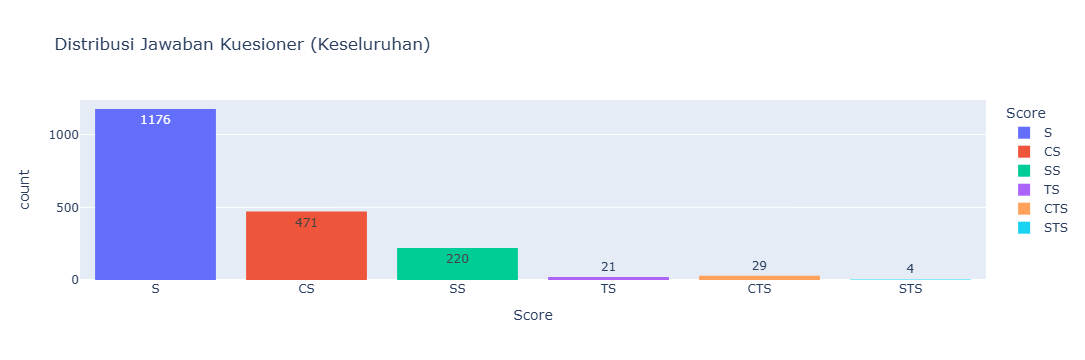

In [ ]:
all_answers = df.melt(id_vars=["Partisipan"], var_name="Question", value_name="Score")

fig = px.histogram(
    all_answers,
    x="Score",
    color="Score",
    text_auto=True,
    title="Distribusi Jawaban Kuesioner (Keseluruhan)"
)
fig.show()


## 2. Pie Chart

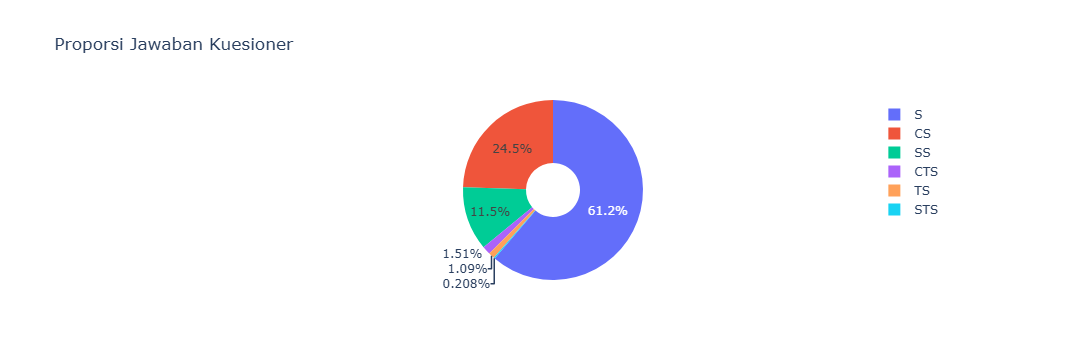

In [ ]:
pie_data = all_answers["Score"].value_counts().reset_index()
pie_data.columns = ["Score", "Count"]

fig = px.pie(
    pie_data,
    names="Score",
    values="Count",
    hole=0.3,
    title="Proporsi Jawaban Kuesioner"
)
fig.show()


## 3. Stacked Bar

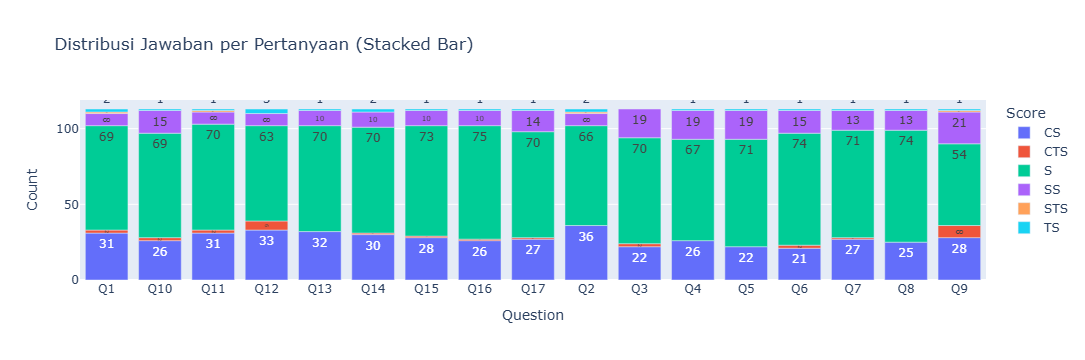

In [ ]:
stack = all_answers.groupby(["Question", "Score"]).size().reset_index(name="Count")

fig = px.bar(
    stack,
    x="Question",
    y="Count",
    color="Score",
    text_auto=True,
    title="Distribusi Jawaban per Pertanyaan (Stacked Bar)"
)
fig.show()


## 4. Bar Chart


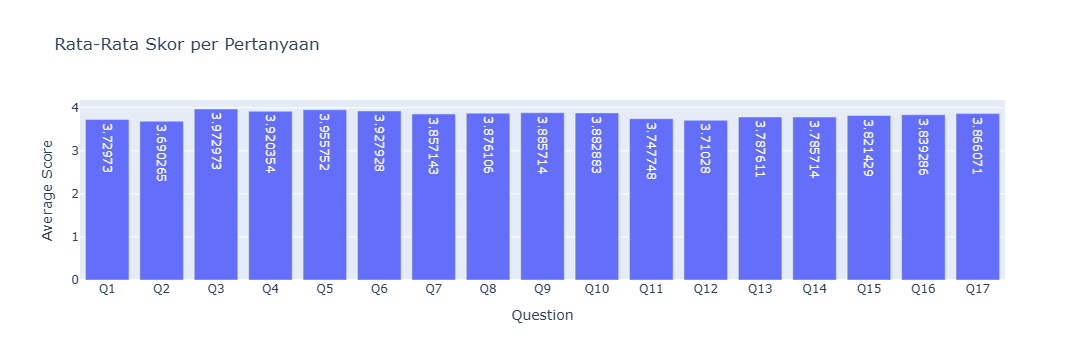

In [ ]:
import pandas as pd
import plotly.express as px

# Set opsi global agar tidak muncul warning
pd.set_option('future.no_silent_downcasting', True)

# Baca data dari Excel
df = pd.read_excel("data_kuesioner.xlsx")

# Mapping nilai ke angka
mapping = {"SS": 5, "S": 4, "CS": 3, "TS": 2, "STS": 1}

# Drop kolom Partisipan lalu replace nilai
df_num = df.drop(columns=["Partisipan"]).replace(mapping)

# Pastikan semuanya numeric (memaksa konversi)
df_num = df_num.apply(pd.to_numeric, errors="coerce")

# Hitung rata-rata per pertanyaan
avg = df_num.mean().reset_index()
avg.columns = ["Question", "Average Score"]

# Plot bar chart
fig = px.bar(
    avg,
    x="Question",
    y="Average Score",
    text_auto=True,
    title="Rata-Rata Skor per Pertanyaan"
)

fig.show()

## 5. Positif – Netral – Negatif

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18080\510133315.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_num = df.drop(columns=["Partisipan"]).replace(mapping)


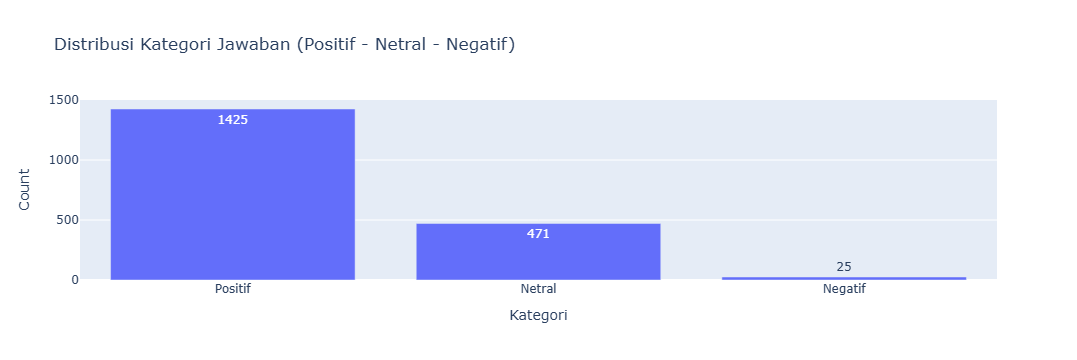

In [ ]:
import pandas as pd
import plotly.express as px

# Baca data dari Excel
df = pd.read_excel("data_kuesioner.xlsx")

# Mapping skor
mapping = {"SS": 5, "S": 4, "CS": 3, "TS": 2, "STS": 1}

# Ubah semua jawaban jadi angka tanpa warning
df_num = df.drop(columns=["Partisipan"]).replace(mapping)
df_num = df_num.infer_objects(copy=False)
df_num = df_num.apply(pd.to_numeric, errors="coerce")

# Fungsi kategori
def kategori(x):
    if x <= 2:
        return "Negatif"
    elif x == 3:
        return "Netral"
    else:
        return "Positif"

# Melt seluruh jawaban
all_answers = df_num.melt(var_name="X", value_name="Score")

# Buat kolom kategori
all_answers["Kategori"] = all_answers["Score"].apply(kategori)

# Hitung frekuensi kategori
kategori_count = all_answers["Kategori"].value_counts().reset_index()
kategori_count.columns = ["Kategori", "Count"]

# Plot
fig = px.bar(
    kategori_count,
    x="Kategori",
    y="Count",
    text_auto=True,
    title="Distribusi Kategori Jawaban (Positif - Netral - Negatif)"
)

fig.show()

## 6. BONUS

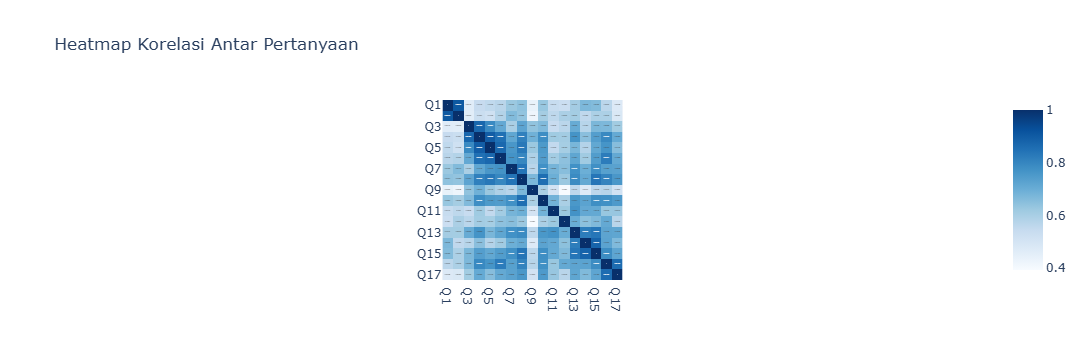

In [ ]:
corr = df_num.corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="Blues",
    title="Heatmap Korelasi Antar Pertanyaan"
)
fig.show()
